In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
import input_data as input_data
import tensorflow_datasets as td
import matplotlib.pyplot as plt


c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

ses=tfc.InteractiveSession()
mnist = input_data.read_data_sets("MNIST",one_hot=True)
print(mnist)


Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST\t10k-images-idx3-ubyte.gz
Extracting MNIST\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.
_Datasets(train=<input_data._DataSet object at 0x000001B596ECBD00>, validation=<input_data._DataSet object at 0x000001B596BF61A0>, test=<input_data._DataSet object at 0x000001B5B1ACB280>)


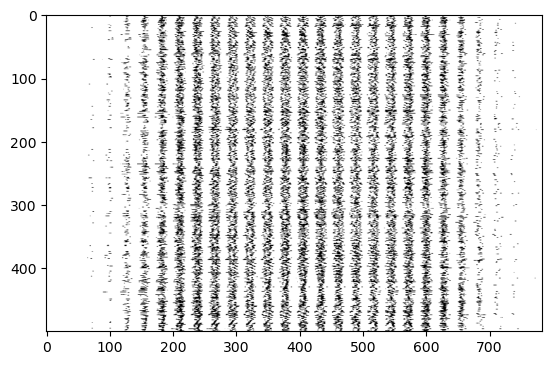

In [3]:
import numpy as np

images=mnist.train.images[0].reshape([1,784])
for i in range(1,500):
    images=np.concatenate((images,mnist.train.images[i].reshape([1,784])))
plt.imshow(images,cmap=plt.get_cmap('gray_r'))


In [12]:
#Creating placeholders for input training data and target labels
tfc.disable_eager_execution()
input_images=tfc.placeholder(tfc.float32,shape=[None,784]) # training data that each input has 784 values
target_labels=tfc.placeholder(tfc.float32,shape=[None,10]) # output has 10 datas with one_hot encoding

In [13]:
#Reserving variables to keep track of all the wts and baises for both layers

hidden_nodes=512

input_weights=tfc.Variable(tfc.truncated_normal([784,hidden_nodes])) # a layer has 784 inputs and 512 hidden outputs as inputs to next layer
input_biases=tfc.Variable(tfc.zeros([hidden_nodes])) # 512 hidden nodes

hidden_weights=tfc.Variable(tfc.truncated_normal([hidden_nodes,10])) #input of 512 and ouput as 10 as one_hot format
hidden_biases=tfc.Variable(tf.zeros([10])) #10 as well

In [31]:
#defining connections layers
@tf.function
def creating(*args):
    input_layer=tfc.matmul(input_images,input_weights)#input layers with image as input and inputed their wts
    hidden_layer=tfc.nn.relu(input_layer,input_biases)#hidden layers get inputs from input_layer and biases
    digit_weights=tfc.matmul(hidden_layer,hidden_weights)+hidden_biases #File classifiaction
    #comparing our output (digit_wts) with target labels using softmax
    loss_function=tfc.reduce_mean(tfc.nn.softmax_cross_entropy_with_logits(logits=digit_weights,labels=target_labels))
    #applying gradient descent optimizer with aggressive learning rate (0.5) with loss function defined above
    optimizer=tfc.train.GradientDescentOptimizer(0.5).minimize(loss_function)
    #Measuring accuracay
    correct_prediction=tfc.equal(tfc.argmax(digit_weights,1),tfc.argmax(target_labels,1))
    accuracy=tfc.reduce_mean(tfc.cast(correct_prediction,tfc,tfc.float32))
    
    tfc.global_variables_initializer().run()
    for x in range(2000):
        batch=mnist.train.next_batch(100)
        optimizer.run(feed_dict={input_images:batch[0],target_labels:batch[1]})
        if((x+1)%100==0):
            print("Training epoch "+ str(x+1))
            print("Accuracy: "+str(accuracy.eval(feed_dict={input_images:mnist.test.images,target_labels:mnist.test.labels})))
    tfc.global_variables_initializer().run()
    return
creating(hidden_nodes,input_biases,input_weights,hidden_biases,hidden_weights)

OperatorNotAllowedInGraphError: in user code:

    File "C:\Users\Ghost\AppData\Local\Temp\ipykernel_7220\269715004.py", line 5, in creating  *
        hidden_layer=tfc.nn.relu(input_layer,input_biases)#hidden layers get inputs from input_layer and biases

    OperatorNotAllowedInGraphError: Using a symbolic `tf.Tensor` as a Python `bool` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.
